## Пример подбрасывания монеты

### Вероятность выпадения орла для обычной монеты равна 1/2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

In [3]:
#Функция подбрасывания монеты

#0 --> Орел
#1 --> Решка

def coin_flip():
    return random.randint(0,1)

In [4]:
#Проверка полученного значения
coin_flip()

0

In [5]:
#Симуляция Монте-Карло

#Пустой список для ввода значений
list1 = []

def monte_carlo(n):
    results = 0
    for _ in tqdm (range(n)):
        flip_result = coin_flip()
        results = results + flip_result
        
        #Высчитывание возможных значений
        prob_value = results/(_+1)
        
        #Включение возможных значений в список
        list1.append(prob_value)
        
        #Вывод результата в график
        plt.axhline(y=0.5, color='r', linestyle='-')
        plt.xlabel("Итераций")
        plt.ylabel("Вероятность")
        plt.plot(list1)
                    
    return results/n

100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [01:31<00:00, 54.80it/s]


Финальные значения:  0.4998


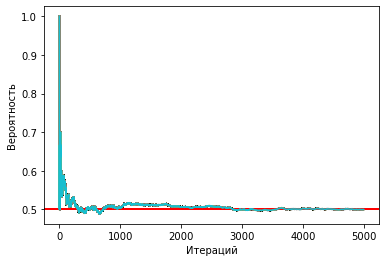

In [6]:
#Вызов главной функции

answer = monte_carlo(5000)
print("Финальные значения: ", answer)

100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [16:17<00:00, 15.35it/s]


Финальные значения:  0.5024


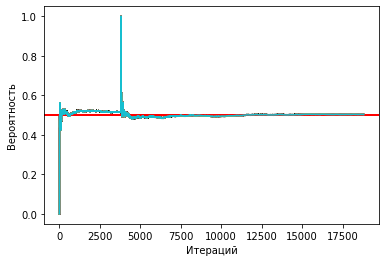

In [48]:
#Вызов главной функции

answer = monte_carlo(15000)
print("Финальные значения: ", answer)

## Парадокс дня рождения

### Парадокс дней рождения — утверждение, гласящее, что если дана группа из 23 или более человек, то вероятность того, что хотя бы у двух из них дни рождения (число и месяц) совпадут, превышает 50 %. Для группы из 60 или более человек вероятность совпадения дней рождения хотя бы у двух её членов составляет более 99 %

In [7]:
1/365

0.0027397260273972603

In [13]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [14]:
days = pd.Series(range(365)) #Генерация чисел

In [15]:
days.sample(10, replace=True)

263    263
277    277
144    144
345    345
67      67
42      42
16      16
312    312
141    141
325    325
dtype: int64

In [17]:
sample = days.sample(10, replace=True)

In [18]:
sample.value_counts()

282    1
301    1
106    1
238    1
303    1
264    1
294    1
71     1
175    1
223    1
dtype: int64

In [20]:
any(sample.value_counts() > 1)

False

In [21]:
def gen(n_people=23):
    return any(days.sample(n_people, replace=True).value_counts() > 1)

In [29]:
gen()

False

In [30]:
n = 1000
res = []
for _ in tqdm(range(n)):
    res.append(gen())

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1959.64it/s]


In [31]:
res

[False,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 F

In [32]:
np.mean(res)

0.489

In [33]:
n = 100000
res = []
for _ in tqdm(range(n)):
    res.append(gen())

100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [00:43<00:00, 2306.01it/s]


In [34]:
np.mean(res)

0.50774

In [270]:
n = 10000
res = []
for _ in tqdm(range(n)):
    res.append(gen())
np.mean(res)

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:04<00:00, 2154.81it/s]


0.5099

In [112]:
room = 50

In [113]:
res2 = []
n = 1000
for i in tqdm(range(room)):
    res = []
    for _ in range(n):
        res.append(gen(i))
    res2.append(np.mean(res))

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:20<00:00,  2.38it/s]


In [55]:
np.mean(res2)

0.51168

In [58]:
res2[:10]

[0.0, 0.0, 0.002, 0.008, 0.028, 0.033, 0.043, 0.068, 0.069, 0.094]

In [114]:
df = pd.DataFrame(res2)

In [115]:
df.tail()

,0
45,0.951
46,0.947
47,0.949
48,0.969
49,0.964


In [116]:
%matplotlib inline

<AxesSubplot:>

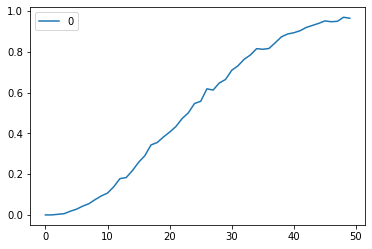

In [117]:
df.plot()

## Предсказание цен за акцию на основе предыдущих значений.

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from tabulate import tabulate
from tqdm import tqdm

In [66]:
!pip install yfinance

In [106]:
#Выбор котировок Amazon за указанный период
amzn = yf.download('AMZN', start='2010-01-01', end='2022-12-17')
amzn.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,6.8125,6.8305,6.6570,6.6950,6.6950,151998000
2010-01-05,6.6715,6.7740,6.5905,6.7345,6.7345,177038000
2010-01-06,6.7300,6.7365,6.5825,6.6125,6.6125,143576000
2010-01-07,6.6005,6.6160,6.4400,6.5000,6.5000,220604000
2010-01-08,6.5280,6.6840,6.4515,6.6760,6.6760,196610000


In [68]:
amzn.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-12,89.209999,90.580002,87.870003,90.550003,90.550003,61999800
2022-12-13,95.230003,96.250000,90.519997,92.489998,92.489998,100212000
2022-12-14,92.500000,93.459999,89.870003,91.580002,91.580002,70298000
2022-12-15,89.889999,89.970001,87.470001,88.449997,88.449997,84802900
2022-12-16,88.269997,89.349998,86.730003,87.860001,87.860001,146044000


In [107]:
#Расчет ежедневной доходности и волатильности акций
daily_returns = amzn['Adj Close'].pct_change()
daily_volatility = daily_returns.std()
round(daily_returns.std(),4)

0.0208

In [108]:
trading_days = 252
count = 0
price_list = []
last_price = amzn['Adj Close'][-1]

price = last_price * (1 + np.random.normal(0, daily_volatility))
price_list.append(price)

for y in range(trading_days):
    if count == 251:
        break
    price = price_list[count]* (1 + np.random.normal(0, daily_volatility))
    price_list.append(price)
    count += 1

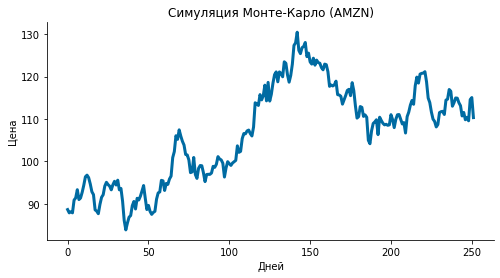

In [109]:
fig,ax = plt.subplots(figsize=(8,4))
ax.spines[['top','right']].set_visible(False)
ax.plot(price_list,color='#006BA2',linewidth=3)
plt.xlabel('Дней')
plt.ylabel('Цена')
plt.title('Симуляция Монте-Карло (AMZN)')
plt.show()

  4%|███▎                                                                           | 83/2000 [00:00<00:02, 824.00it/s]C:\Users\ekuma\AppData\Local\Temp/ipykernel_3608/2813059621.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[x] = price_list
100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 815.59it/s]


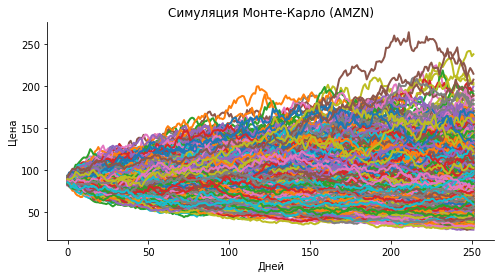

In [110]:
simulations =  2000
df = pd.DataFrame()
last_price_list = []
for x in tqdm(range(simulations)):
    count = 0
    price_list = []
    price = last_price * (1 + np.random.normal(0, daily_volatility))
    price_list.append(price)
    
    for y in range(trading_days):
        if count == 251:
            break
        price = price_list[count]* (1 + np.random.normal(0, daily_volatility))
        price_list.append(price)
        count += 1
        
    df[x] = price_list
    last_price_list.append(price_list[-1])
        
fig,ax = plt.subplots(figsize=(8,4))
ax.spines[['top','right']].set_visible(False)
plt.title('Симуляция Монте-Карло (AMZN)')
ax.plot(df,linewidth=2)
plt.xlabel('Дней')
plt.ylabel('Цена')
plt.show()

In [86]:
np.mean(last_price_list)

88.40231720574528

In [111]:
mean_simulated_price = round(np.mean(last_price_list),2)
quantile_5 = np.percentile(last_price_list,5)
quantile_95 = np.percentile(last_price_list,95)

print(tabulate([['Среднее значение смоделированных цен',mean_simulated_price],['Квантиль (5%)',quantile_5],['Квантиль (95%)',quantile_95]],headers=['AMZN','Рыночная цена (USD)'],tablefmt = 'fancy_grid',stralign = 'center', numalign= 'center',floatfmt=".2f"))

╒══════════════════════════════════════╤═══════════════════════╕
│                 AMZN                 │  Рыночная цена (USD)  │
╞══════════════════════════════════════╪═══════════════════════╡
│ Среднее значение смоделированных цен │         88.54         │
├──────────────────────────────────────┼───────────────────────┤
│            Квантиль (5%)             │         48.35         │
├──────────────────────────────────────┼───────────────────────┤
│            Квантиль (95%)            │        144.10         │
╘══════════════════════════════════════╧═══════════════════════╛
